# IVP Lab - 11

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Task1: Sobel Operation

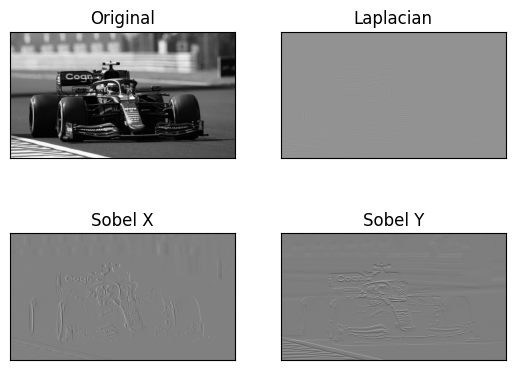

In [29]:
img = cv.imread('image.png', cv.IMREAD_GRAYSCALE)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Task2: Canny Edge Detection

(Text(0.5, 1.0, 'Canny Edge Detection'), ([], []), ([], []))

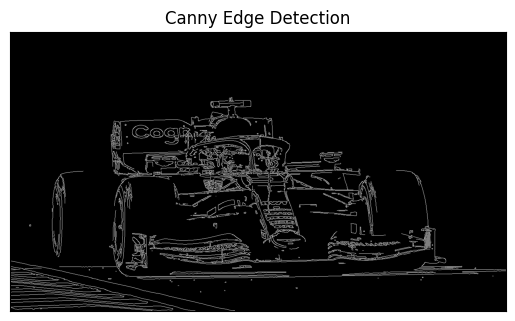

In [30]:
canny_edges = cv.Canny(img, 100, 200)

plt.imshow(canny_edges,cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

## Task3: Derivative Of Gaussian (DoG)

### **Kernel Generation**

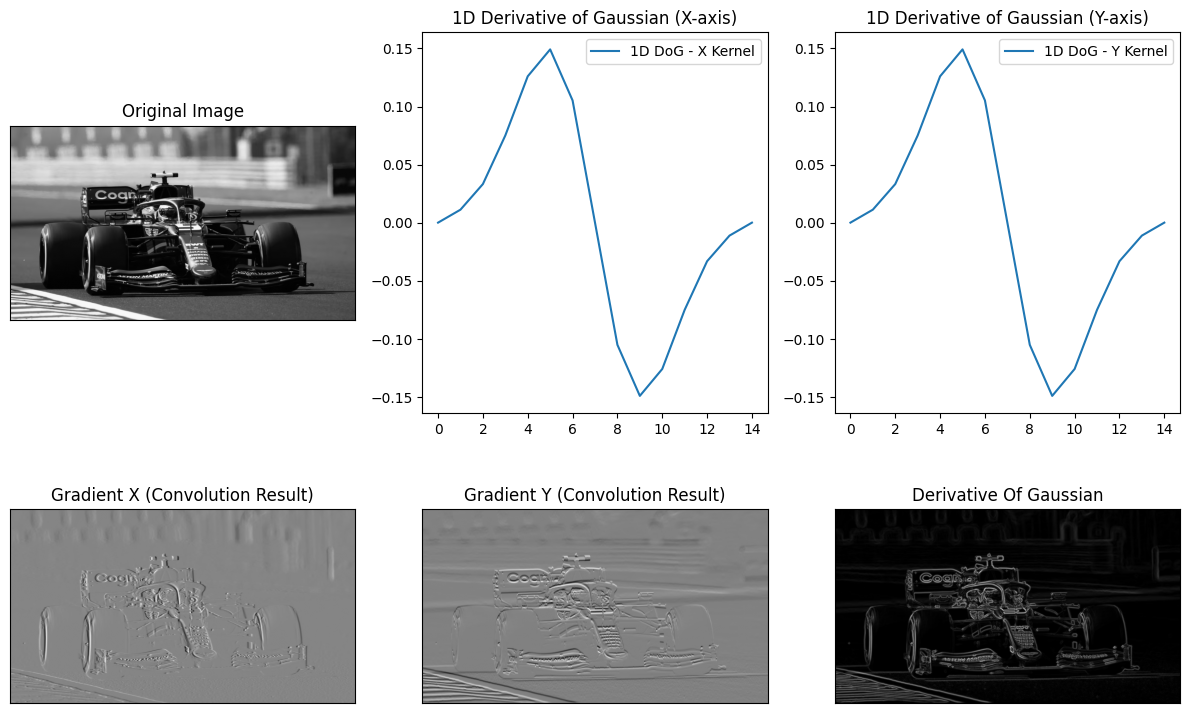

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        kernel[i] = np.exp(-(i - center) ** 2 / (2 * sigma ** 2))
    return kernel / np.sum(kernel)

def dog_kernel(size, sigma):
    g = gaussian_kernel(size, sigma)
    dg = np.zeros_like(g)
    for i in range(1, size - 1):
        dg[i] = (g[i + 1] - g[i - 1]) / 2
    return dg / np.sum(np.abs(dg)) 

def apply_dog_2d(image, kernel_x, kernel_y):
    grad_x = cv2.filter2D(image, -1, kernel_x.reshape(1, -1))
    grad_y = cv2.filter2D(image, -1, kernel_y.reshape(-1, 1))
    return grad_x, grad_y


image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)


image = np.float64(image)


kernel_size = 15
sigma = 2.0


kernel_x = dog_kernel(kernel_size, sigma)
kernel_y = dog_kernel(kernel_size, sigma)


kernel_2d = np.outer(kernel_y, kernel_x)

grad_x, grad_y = apply_dog_2d(image, kernel_x, kernel_y)

grad_x = np.float64(grad_x)
grad_y = np.float64(grad_y)


gradient_magnitude = cv2.magnitude(grad_x, grad_y)


plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])


plt.subplot(3, 3, 2)
plt.plot(kernel_x, label='1D DoG - X Kernel')
plt.title('1D Derivative of Gaussian (X-axis)')
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(kernel_y, label='1D DoG - Y Kernel')
plt.title('1D Derivative of Gaussian (Y-axis)')
plt.legend()



plt.subplot(3, 3, 4)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X (Convolution Result)')
plt.xticks([]), plt.yticks([])


plt.subplot(3, 3, 5)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y (Convolution Result)')
plt.xticks([]), plt.yticks([])


plt.subplot(3, 3, 6)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Derivative Of Gaussian')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


## Laplacian of Gaussian (LoG)

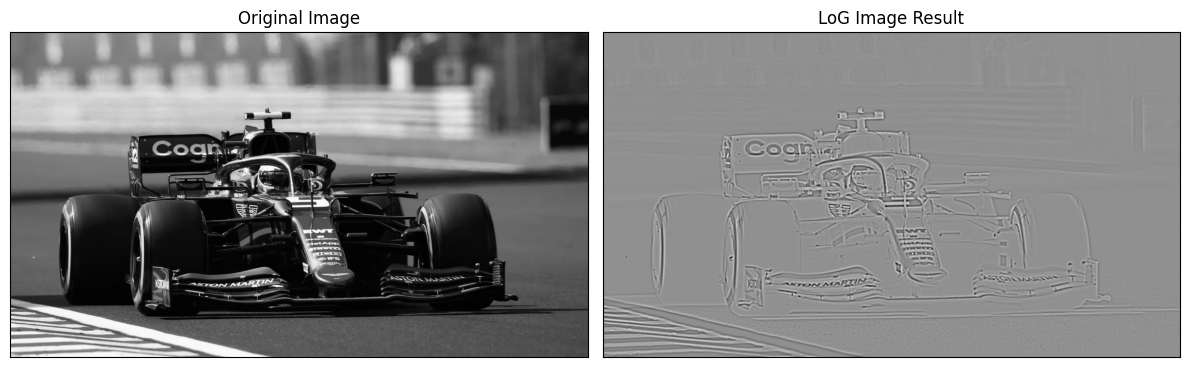

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(size, sigma):
    kernel = np.zeros(size)
    center = size // 2
    for i in range(size):
        kernel[i] = np.exp(-(i - center) ** 2 / (2 * sigma ** 2))
    return kernel / np.sum(kernel)

def log_kernel(size, sigma):

    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)

    gaussian_2d = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    log_2d = -(1 / (np.pi * sigma**4)) * (1 - (X**2 + Y**2) / (2 * sigma**2)) * gaussian_2d
    
    return log_2d

def apply_kernel_2d(image, kernel_2d):
    return cv2.filter2D(image, -1, kernel_2d)


image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

image = np.float64(image)

kernel_size = 15
sigma = 2.0

log_kernel_2d = log_kernel(kernel_size, sigma)

log_result = apply_kernel_2d(image, log_kernel_2d)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])


plt.subplot(1, 2, 2)
plt.imshow(log_result, cmap='gray')
plt.title('LoG Image Result')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
